In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import os
import random
import time

# Inside the /Multimodal-Deep-Regression/notebooks
import sys
sys.path.append("..")

from util.utilities import train, evaluate, get_device
from util.data_utilities import get_base_tensor_directories, generate_batch, get_train_and_val_loader

# import all the models from models module
from models import CNN3D

device = get_device()

You are using device: cuda


In [2]:
# Current Path
os.getcwd()

'c:\\Users\\ahmed\\Documents\\DeepLearningSummer\\Multimodal-Deep-Regression\\notebooks'

In [3]:
device = get_device()
train_loader, val_loader = get_train_and_val_loader(
    input_type='video_pack_5000',
    batch_size=25,
    verbose=True,
    # tensor_upper_limit=95
)

You are using device: cuda
torch.Size([3, 15, 170, 96])
torch.Size([3, 15, 170, 96])
3998
1000


In [4]:
model = CNN3D(
    reduce_pool=8,
    filters=15,
    depth=30,
    dropout_rate=0.1
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.9)
model = model.to(device)

total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")

EPOCHS = 50

train_losses = []
val_losses = []

input_verbose = False


Total parameters: 415,951


In [5]:
start_time = time.time()

for epoch in range(EPOCHS):
    train_loss, avg_train_loss = train(model, train_loader, criterion, optimizer, device, verbose=input_verbose)
    val_loss, avg_val_loss = evaluate(model, val_loader, criterion, device, verbose=input_verbose)
    
    # record the losses
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

    # print every num times epoch only
    num = 1
    if ((epoch+1) % num == 0) or epoch == 0:
        if epoch == 0:
            time_took = (time.time() - start_time) / 60
            print(f'First epoch took {time_took:.1f} minutes.')
        print(f'Epoch {epoch+1}/{EPOCHS}, Train_Loss: {train_loss:.2f}, Avg: {avg_train_loss:.2f}; Val_Loss: {val_loss:.2f}, Avg: {avg_val_loss:.2f}')


First epoch took 0.6 minutes.
Epoch 1/50, Train_Loss: 65651702236.00, Avg: 410323138.98; Val_Loss: 4565757172.00, Avg: 114143929.30
Epoch 2/50, Train_Loss: 64784601432.00, Avg: 404903758.95; Val_Loss: 4851946776.00, Avg: 121298669.40
Epoch 3/50, Train_Loss: 64368842322.00, Avg: 402305264.51; Val_Loss: 5055006932.00, Avg: 126375173.30
Epoch 4/50, Train_Loss: 63809161894.00, Avg: 398807261.84; Val_Loss: 4959320660.00, Avg: 123983016.50
Epoch 5/50, Train_Loss: 63752040614.00, Avg: 398450253.84; Val_Loss: 4590286394.00, Avg: 114757159.85
Epoch 6/50, Train_Loss: 63002112736.00, Avg: 393763204.60; Val_Loss: 4612843542.00, Avg: 115321088.55
Epoch 7/50, Train_Loss: 62578583546.00, Avg: 391116147.16; Val_Loss: 4666627124.00, Avg: 116665678.10
Epoch 8/50, Train_Loss: 62520939600.00, Avg: 390755872.50; Val_Loss: 4753735183.00, Avg: 118843379.58
Epoch 9/50, Train_Loss: 61881839430.00, Avg: 386761496.44; Val_Loss: 5112696800.00, Avg: 127817420.00
Epoch 10/50, Train_Loss: 61687256754.00, Avg: 385545

In [ ]:
# save model if better or not exists
model_weights = {'model_state_dict': model.state_dict(), 'val_loss': avg_val_loss}
weights_file = '../models/save/CNN_weights.pt'
if not os.path.isfile(weights_file):
    # save new
    torch.save(model_weights, weights_file)
elif model_weights['val_loss'] < torch.load(weights_file)['val_loss']:
    # replace
    torch.save(model_weights, weights_file)

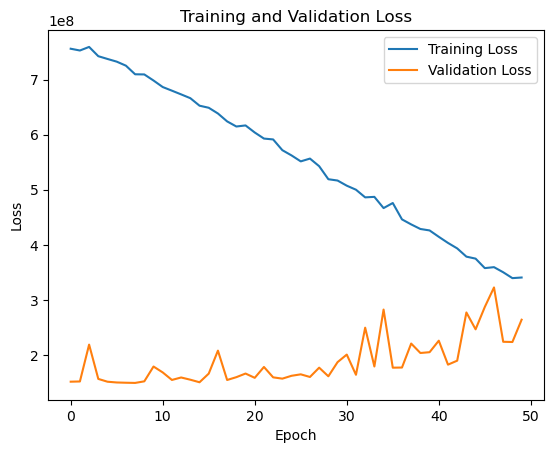

In [ ]:
import matplotlib.pyplot as plt

# lost plot
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# compare to validation set
val_values = []
predicted_values = []

for inputs, targets in val_loader:
    inputs, targets = inputs.to(torch.float32).to(device), targets.to(torch.float32).to(device)

    # Forward pass
    outputs = model(inputs)

    # Append the values
    val_values.extend(targets.tolist())
    predicted_values.extend(outputs.tolist())

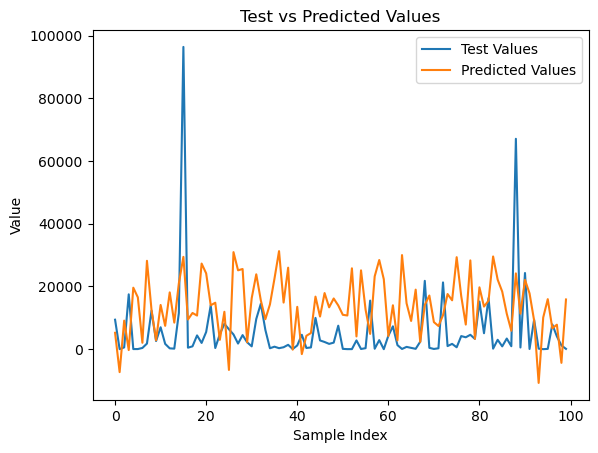

In [ ]:
import matplotlib.pyplot as plt

plt.plot(val_values, label='Test Values')
plt.plot(predicted_values, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Test vs Predicted Values')
plt.legend()
plt.show()

In [ ]:
for i in range(len(predicted_values)):
    print(f'Test value: {val_values[i]}, Predicted Value: {predicted_values[i]}')

Test value: 9408.0, Predicted Value: [5235.83349609375]
Test value: 10.800000190734863, Predicted Value: [-7306.23681640625]
Test value: 581.2999877929688, Predicted Value: [9112.7978515625]
Test value: 17500.0, Predicted Value: [-268.87701416015625]
Test value: 46.900001525878906, Predicted Value: [19620.40625]
Test value: 51.20000076293945, Predicted Value: [16540.25390625]
Test value: 399.3999938964844, Predicted Value: [2052.81884765625]
Test value: 1800.0, Predicted Value: [28192.31640625]
Test value: 12300.0, Predicted Value: [12546.98828125]
Test value: 2600.0, Predicted Value: [2847.6875]
Test value: 7000.0, Predicted Value: [14118.71875]
Test value: 1700.0, Predicted Value: [7447.53369140625]
Test value: 274.5, Predicted Value: [18120.19921875]
Test value: 179.89999389648438, Predicted Value: [8481.2392578125]
Test value: 11500.0, Predicted Value: [20992.669921875]
Test value: 96400.0, Predicted Value: [29448.4609375]
Test value: 484.0, Predicted Value: [9473.8486328125]
Test 